In [68]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime,timedelta
import sunpy.lightcurve as lc

In [2]:
f = open("9-6-2017-9-6-2017","r")
#print F.read(5)
l0 = f.readline()
l1 = f.readline()
l2 = f.readline()
l3 = f.readline()

In [3]:
print l0,l1,l2,l3

Author,Lenovo
TimeStamp,9/6/2017  11:09
Sample Clock Rate,0.00




In [4]:
ltest = f.readline()

In [5]:
col0=[]
col1=[]
col2=[]
cont=0

while ltest[0] <> 'A':
    col0.append(cont)
    col1.append(float(ltest[:5]))
    col2.append(float(ltest[9:14]))
    ltest = f.readline()
    cont += 1
else:
    print ltest
    ll1 = f.readline()
    ll2 = f.readline()
    ll3 = f.readline()
    lltest = f.readline()
    print ll1,ll2,ll3,lltest

Author,Lenovo

TimeStamp,9/6/2017  17:09
Sample Clock Rate,0.00

0.951    0.772



In [6]:
start = datetime.strptime("2017-09-06 11:09:00.000", "%Y-%m-%d %H:%M:%S.%f")
end = datetime.strptime("2017-09-06 17:09:00.100", "%Y-%m-%d %H:%M:%S.%f")

In [7]:
dt = start##datetime(2010, 12, 01)
end = end## datetime(2010, 12, 01, 23, 59, 59)
step = timedelta(milliseconds=20)

timlis = []

while dt < end:
    timlis.append(dt)##.strftime('%Y-%m-%d %H:%M:%S.%f'))
    dt += step

In [39]:
rawR = np.array(col1)
Right = rawR - np.min(rawR)
rawL = np.array(col2)
Left = rawL - np.min(rawL)

path='/home/douglas/Polarimetro7GHz/'
data = np.genfromtxt(path+'gev_20170906_115300_GOESFLUXdata.txt',\
                     dtype=[('time_tag', 'S19'),\
                            ('A FLUX', '>f14'),\
                            ('B FLUX', '>f14')],\
                     delimiter=",",skip_header=1)

fmt="%Y-%m-%d %H:%M:%S"
evehrtime=[]
for i in range(len(data['time_tag'])):
    temtime.append(datetime.strptime(data['time_tag'][i],fmt))

dat_A = data['A Flux']###-np.nanmin(data['18nm'])
#dat18 = dat18/np.nanmax(dat18)
dat_B = data['B Flux']###-0*np.nanmin(data['26nm'])
#dat26 = dat26/np.nanmax(dat26)
#dat30 = data['30nm']-np.nanmin(data['30nm'])
#dat30 = dat30/np.nanmax(dat30)
#dat36 = data['36nm']-np.nanmin(data['36nm'])
#dat36 = dat36/np.nanmax(dat36)
goestemlc = sunpy.lightcurve.LightCurve.create(
{'A':dat_A,
 'B':dat_B},
    index=temtime)

In [ ]:
/home/douglas/Polarimetro7GHz/gev_20170906_115300_GOESTEMdata.txt

In [69]:
path='/home/douglas/Polarimetro7GHz/'
data = np.genfromtxt(path+'gev_20170906_115300_GOESTEMdata.txt',\
                     dtype=[('timetag', 'S19'),\
                            ('T', '>f8'),\
                            ('EM', '>f8')],\
                     delimiter=",",skip_header=1)

fmt="%Y-%m-%d %H:%M:%S"
temtime=[]
for i in range(len(data['timetag'])):
    temtime.append(datetime.strptime(data['timetag'][i],fmt))

dat_T = data['T']###-np.nanmin(data['18nm'])
#dat18 = dat18/np.nanmax(dat18)
dat_EM = data['EM']###-0*np.nanmin(data['26nm'])
#dat26 = dat26/np.nanmax(dat26)
#dat30 = data['30nm']-np.nanmin(data['30nm'])
#dat30 = dat30/np.nanmax(dat30)
#dat36 = data['36nm']-np.nanmin(data['36nm'])
#dat36 = dat36/np.nanmax(dat36)
goestemlc = lc.LightCurve.create(
{'T':dat_T,
 'EM':dat_EM},
    index=temtime)


In [71]:
from sunpy.time import TimeRange
goes = lc.GOESLightCurve.create(TimeRange('2017/09/06', '2017/09/07'))
#goes.peek()   # doctest: +SKIP


/home/douglas/anaconda2/lib/python2.7/site-packages/sunpy/lightcurve/lightcurve.py:299: RuntimeWarning: Using existing file rather than downloading, use overwrite=True to override.
  "overwrite=True to override.", RuntimeWarning)


In [73]:
for items in goes.data:
    print items

xrsa
xrsb


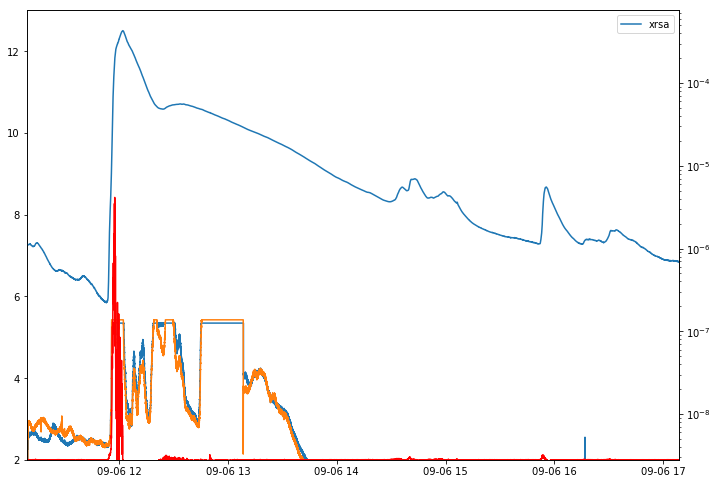

In [139]:
fig = plt.figure(figsize = (11.69,8.27))
ax1 = fig.add_subplot(111)
ini = datetime.strptime("2017-09-06 11:09:00.000", "%Y-%m-%d %H:%M:%S.%f")
fin = datetime.strptime("2017-09-06 17:09:00.000", "%Y-%m-%d %H:%M:%S.%f")                        
ax1.plot(timlis,Right)
ax1.plot(timlis,Left)
ax2 = ax1.twinx()
#ax2.plot(goestemlc.data.index,goestemlc.data['EM'],label='EM')
#ax2.plot(goestemlc.data.index,np.ediff1d(goestemlc.data['EM'],to_end=0),color='r',label='EM')
ax2.plot(goes.data.index,goes.data['xrsa'],label='xrsa')
#ax3 = ax1.twinx()
ax1.plot(goes.data.index,2+1e6*np.ediff1d(goes.data['xrsa'],to_end=0),color='r',label='EM')
ax1.set_xlim(ini,fin)
ax1.set_ylim(2.0,13.0)
#ax3.set_ylim(-0.03,0.5)
ax2.set_yscale('log')
ax2.legend()